# Analyze Efficiency and accuracy  on Cluster



The chunks are all on the sample axis. The shape of the data coming into the PCA is `(n_sample, 132651)`.

Information about the nodes (hive) can be found here:

https://docs.pace.gatech.edu/hive/resources/


## Conclusions

???

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from toolz.curried import map as fmap
from toolz.curried import curry

# 16 core machine but only used 4 workers 2 thread per worker 100 Gb memory

In [6]:
data = pd.read_csv("job8_memorystudy_desktop/OUTPUT.csv",index_col=False)

In [7]:
data

,chunks,samples,memory_usage,fit_time,predict_time,r_squared
0,1,2000,19103.656250,145.576,43.418,0.968
1,1,4000,37365.890625,278.655,86.485,0.967
2,1,8000,73285.718750,574.476,172.258,0.961
3,1,2000,19133.281250,143.981,43.565,0.970
4,1,4000,37376.835938,272.495,85.123,0.953
5,1,8000,73317.738281,559.126,172.943,0.971
6,2,2000,19270.730469,76.036,22.076,0.961
7,2,4000,37469.886719,145.508,43.930,0.904
8,2,8000,73908.589844,285.558,87.924,0.969
9,2,2000,19305.578125,77.516,22.054,0.798


In [8]:
data2000 = data.loc[data.samples == 2000].groupby('chunks').min()
data4000 = data.loc[data.samples == 4000].groupby('chunks').min()
data6000 = data.loc[data.samples == 6000].groupby('chunks').min()
data8000 = data.loc[data.samples == 8000].groupby('chunks').min()

In [9]:
data2000

,samples,memory_usage,fit_time,predict_time,r_squared
chunks,,,,,
1,2000,19103.656250,143.981,43.418,0.968
2,2000,19270.730469,76.036,22.054,0.798
4,2000,19389.316406,44.828,11.501,0.959
16,2000,14265.316406,32.090,6.536,0.837
32,2000,9087.226562,30.321,7.379,0.904


In [10]:
data2000.index

Int64Index([1, 2, 4, 16, 32], dtype='int64', name='chunks')

In [11]:
data2000.iloc[:,1]

chunks
1     19103.656250
2     19270.730469
4     19389.316406
16    14265.316406
32     9087.226562
Name: memory_usage, dtype: float64

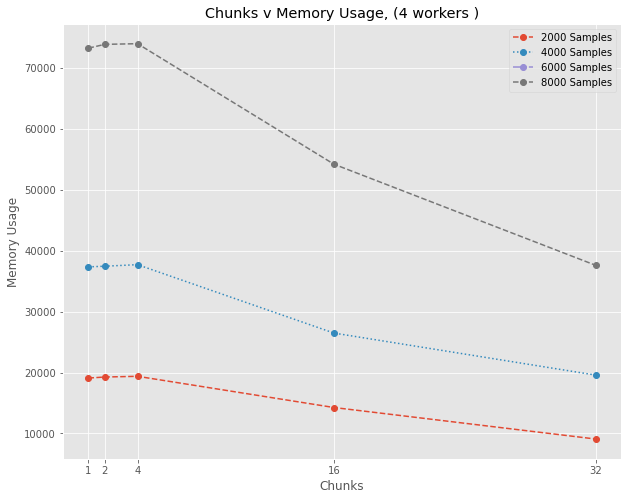

In [32]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000.index, data2000.iloc[:,1],'o--', label='2000 Samples')
plt.plot(data4000.index, data4000.iloc[:,1], 'o:', label='4000 Samples')
plt.plot(data6000.index, data6000.iloc[:,1], 'o-.', label='6000 Samples')
plt.plot(data8000.index, data8000.iloc[:,1], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v Memory Usage, (4 workers )')
plt.xlabel('Chunks')
plt.ylabel('Memory Usage')
plt.legend()

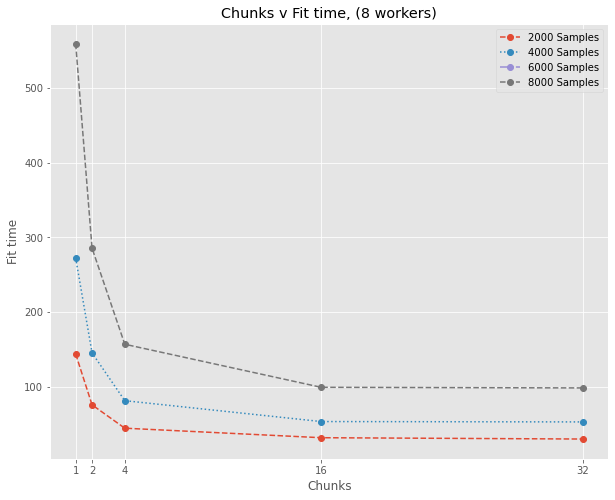

In [16]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000.index, data2000.iloc[:,2],'o--', label='2000 Samples')
plt.plot(data4000.index, data4000.iloc[:,2], 'o:', label='4000 Samples')
plt.plot(data6000.index, data6000.iloc[:,2], 'o-.', label='6000 Samples')
plt.plot(data8000.index, data8000.iloc[:,2], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v Fit time, (8 workers)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

# Adding more chunks

In [18]:
data_16 = pd.read_csv("job9_memorystudy/OUTPUT.csv",index_col=False)

data2000_16 = data_16.loc[data_16.samples == 2000].groupby('chunks').min()
data4000_16 = data_16.loc[data_16.samples == 4000].groupby('chunks').min()
data6000_16 = data_16.loc[data_16.samples == 6000].groupby('chunks').min()
data8000_16 = data_16.loc[data_16.samples == 8000].groupby('chunks').min()

In [19]:
data_16

,chunks,samples,memory_usage,fit_time,predict_time,r_squared
0,32,8000,35531.480469,122.365,33.413,0.967
1,32,8000,34490.652344,111.510,33.019,0.952
2,48,8000,29733.273438,114.072,33.070,0.970
3,48,8000,27847.878906,111.202,32.327,0.933
4,64,8000,24210.644531,109.789,32.676,0.853
5,64,8000,25497.960938,115.080,31.065,0.944
6,72,8000,25148.351562,110.254,30.546,0.914
7,72,8000,26132.851562,106.332,32.166,0.782


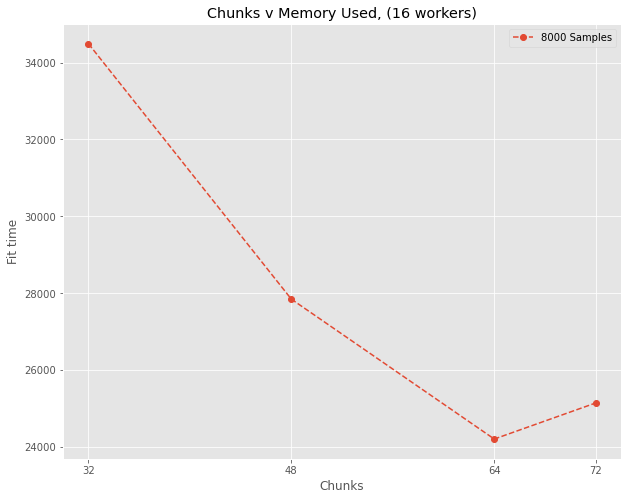

In [21]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data8000_16.index, data8000_16.iloc[:,1], 'o--', label='8000 Samples')
plt.xticks(data8000_16.index)
plt.title('Chunks v Memory Used, (16 workers)')
plt.xlabel('Chunks')
plt.ylabel('Memory Usage')
plt.legend()

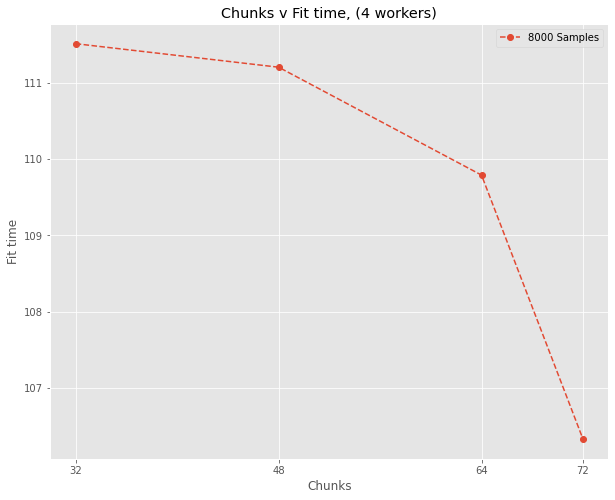

In [24]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data8000_16.index, data8000_16.iloc[:,2], 'o--', label='8000 Samples')
plt.xticks(data8000_16.index)
plt.title('Chunks v Fit time, (4 workers)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

# 16 Core   or 16 workers 2 thread per worker

In [25]:
data_24 = pd.read_csv("job10_memorystudy/OUTPUT.csv",index_col=False)

data2000_24 = data_24.loc[data_24.samples == 2000].groupby('chunks').min()
data4000_24 = data_24.loc[data_24.samples == 4000].groupby('chunks').min()
data6000_24 = data_24.loc[data_24.samples == 6000].groupby('chunks').min()
data8000_24 = data_24.loc[data_24.samples == 8000].groupby('chunks').min()

In [26]:
data_24

,chunks,samples,memory_usage,fit_time,predict_time,r_squared
0,32,8000,67576.933594,64.784,19.467,0.936
1,32,8000,69638.664062,60.827,16.702,0.937
2,48,8000,56228.492188,60.541,16.227,0.972
3,48,8000,59509.832031,59.228,15.652,0.944
4,64,8000,52273.605469,63.813,18.502,0.960
5,64,8000,51742.886719,64.754,17.350,0.950
6,72,8000,49747.222656,63.554,17.851,0.972
7,72,8000,50781.585938,62.903,17.360,0.899


check constant memory! Loading Python etc. (each worker has constant ?)

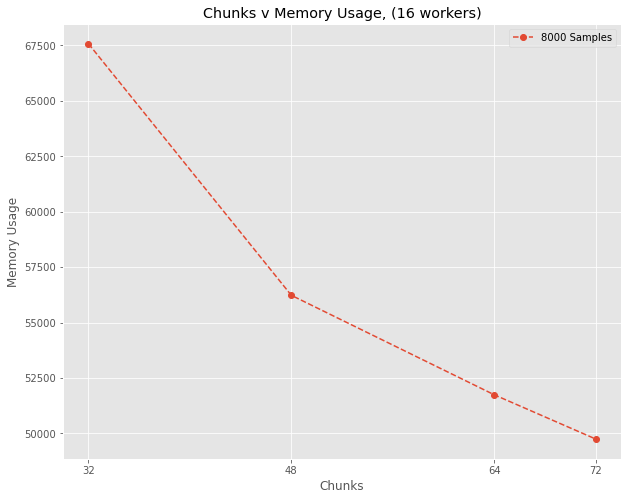

In [29]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))


plt.plot(data8000_24.index, data8000_24.iloc[:,1], 'o--', label='8000 Samples')
plt.xticks(data8000_24.index)
plt.title('Chunks v Memory Usage, (16 workers)')
plt.xlabel('Chunks')
plt.ylabel('Memory Usage')
plt.legend()

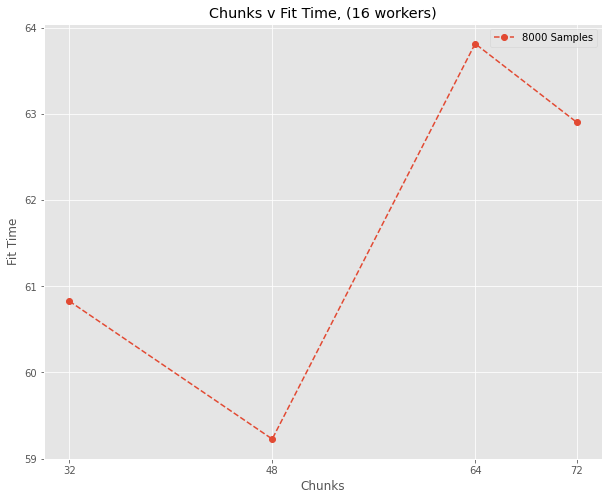

In [30]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))


plt.plot(data8000_24.index, data8000_24.iloc[:,2], 'o--', label='8000 Samples')
plt.xticks(data8000_24.index)
plt.title('Chunks v Fit Time, (16 workers)')
plt.xlabel('Chunks')
plt.ylabel('Fit Time')
plt.legend()

# Accuracy 

In [16]:
data8000

,samples,fit_time,predict_time,r_squared
chunks,,,,
1,8000,2715.215,183.038,0.795
2,8000,1349.436,90.032,0.897
4,8000,681.148,46.968,0.907
8,8000,353.007,26.039,0.897
16,8000,209.121,28.869,0.857
24,8000,171.892,27.061,0.819
32,8000,149.047,30.974,0.660
40,8000,138.128,31.588,0.917
48,8000,130.520,29.821,0.862


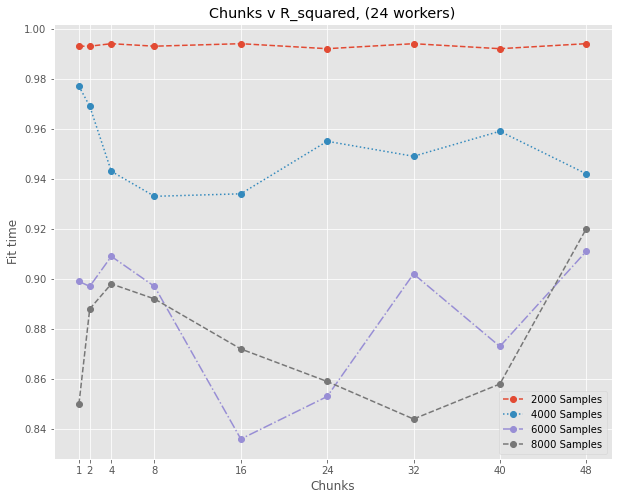

In [17]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000_24.index, data2000_24.iloc[:,3],'o--', label='2000 Samples')
plt.plot(data4000_24.index, data4000_24.iloc[:,3], 'o:', label='4000 Samples')
plt.plot(data6000_24.index, data6000_24.iloc[:,3], 'o-.', label='6000 Samples')
plt.plot(data8000_24.index, data8000_24.iloc[:,3], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v R_squared, (24 workers)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()